In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [22]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    MaxPooling2D(pool_size=(2, 2)),
    # reducing computation ,dimensions ,and overfitting
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    # again we added 64 filters
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    # converts the 2D feature maps into a 1D vector for input into the fully connected layer
    Dense(128, activation='relu'),
    # add a dense (fully connected) layer with 128 neurons to learn complex features
    Dense(10, activation='softmax')
    # the output layer predicts probabilities for each of the 10 digit classes (0-9).
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test), epochs=15, batch_size=64, verbose=1)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 125s 133ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9920 - val_loss: 0.0384
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 127s 136ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9922 - val_loss: 0.0420
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 131ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9917 - val_loss: 0.0461
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 130ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 0.9919 - val_loss: 0.0484
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9935 - val_loss: 0.0385
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 120s 128ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9923 - val_loss: 0.0409
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 130ms/step - accuracy: 0.9988 - loss: 0.0041 - val_accuracy: 0.9900 - val_loss: 0.0490
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 149s 137ms/step - accuracy: 0.9991 -

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,456,544 (5.56 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 971,030 (3.70 MB)

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9911 - loss: 0.0632
Test Loss: 0.0495
Test Accuracy: 0.9928


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
y_pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [29]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [30]:
cm = confusion_matrix(y_true, y_pred_classes)

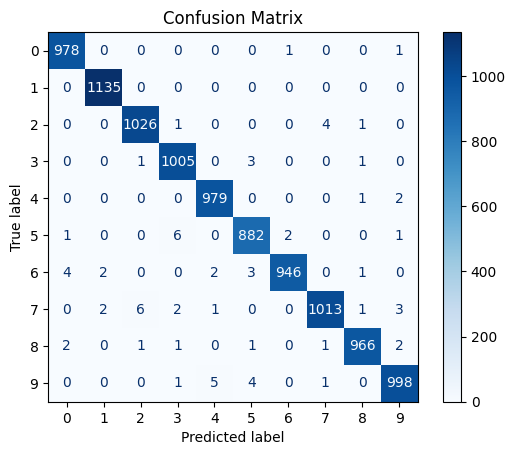

In [31]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


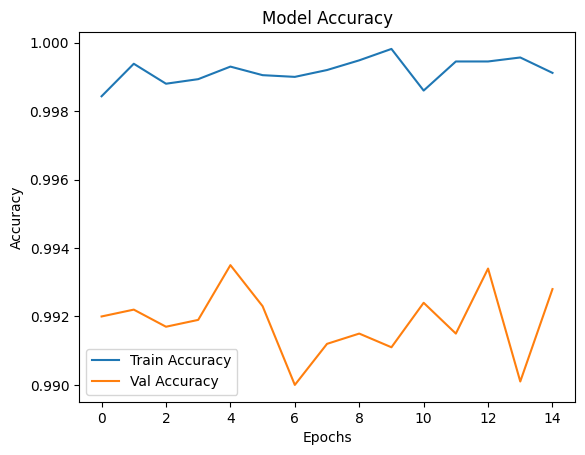

In [33]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


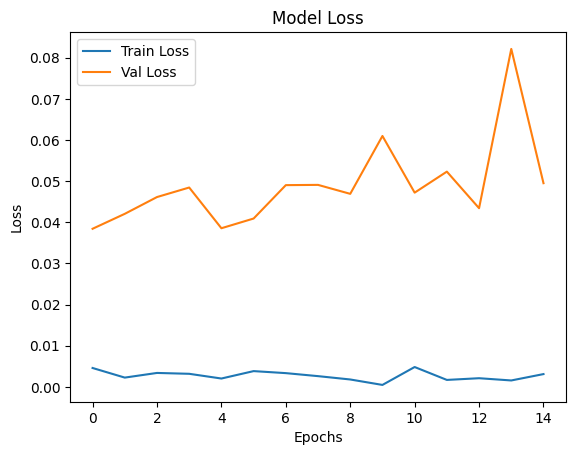

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [35]:
sample_images = x_test[:5]
sample_labels = y_test[:5]
predictions = model.predict(sample_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


--------------------------


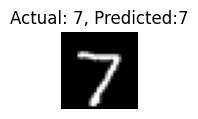

--------------------------


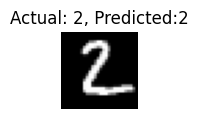

--------------------------


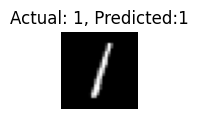

--------------------------


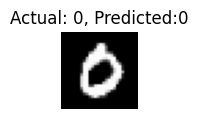

--------------------------


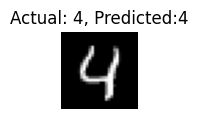

In [36]:
for i in range(5):
    plt.figure(figsize=(1, 1))
    print('--------------------------')
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {tf.argmax(sample_labels[i]).numpy()}, Predicted:{tf.argmax(predictions[i]).numpy()}")
    plt.axis('off')
    plt.show()
